In [0]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [0]:
df = pd.read_csv('/content/drive/My Drive/shared drive/Python 5512/pizza_11_2.csv',encoding = 'latin-1')
df.head()

,store_name,city,state,zip,keys,latitude,longitude,menu_description,menu_name,has_meat,has_veg,price,state_population,state_land_area,state_population_density,state_median_income,min_distance
0,Shotgun Dans Pizza,Sherwood,AR,72120,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,NaN,Cheese Pizza,0,0,7.98,2978204,52068,57.2,43813,0.0478
1,Sauce Pizza Wine,Phoenix,AZ,85012,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,Pizza Cookie,0,0,6.00,6828065,113635,60.1,53510,0.0044
2,Mios Pizzeria,Cincinnati,OH,45209,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,0,0,6.49,11613423,40948,283.6,52407,0.0287
3,Hungry Howies Pizza,Madison Heights,MI,48071,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,Small Pizza,0,0,5.99,9922576,56804,174.7,52668,0.0246
4,Spartan Pizzeria,Baltimore,MD,21224,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,Pizza Sub,0,0,5.49,6006401,9774,614.5,78916,0.0049


In [0]:
df.columns

Index(['store_name', 'city', 'state', 'zip', 'keys', 'latitude', 'longitude',
       'menu_description', 'menu_name', 'has_meat', 'has_veg', 'price',
       'state_population', 'state_land_area', 'state_population_density',
       'state_median_income', 'min_distance'],
      dtype='object')

In [0]:
df.dtypes

store_name                   object
city                         object
state                        object
zip                          object
keys                         object
latitude                    float64
longitude                   float64
menu_description             object
menu_name                    object
has_meat                      int64
has_veg                       int64
price                       float64
state_population              int64
state_land_area               int64
state_population_density    float64
state_median_income           int64
min_distance                float64
dtype: object

In [0]:
#What are the least and most expensive cities for pizza?
city = df.groupby(['city'])['price'].mean()
city.head()

city
Aberdeen    17.470000
Abilene      4.990000
Abingdon    10.502000
Abington     9.235714
Akron       10.985455
Name: price, dtype: float64

In [0]:
city.sort_values(0,ascending = True).head(1)

city
Cadiz    0.25
Name: price, dtype: float64

In [0]:
city.sort_values(0,ascending = False).head(1)

city
Allison Park    32.99
Name: price, dtype: float64

In [0]:
top = city.sort_values(0, ascending=False).head(5)

In [0]:
top.reset_index()

,city,price
0,Allison Park,32.990000
1,Chesapeake,30.000000
2,Eagle Point,26.564286
3,Pleasant Hill,26.000000
4,Palmer,25.990000


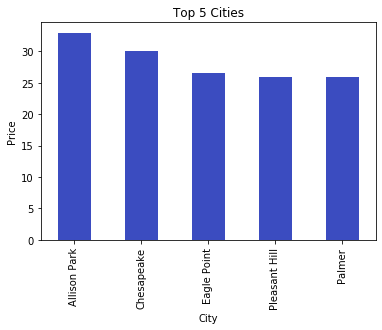

In [0]:
fig, ax = plt.subplots()  
top.plot(kind='bar', colormap='coolwarm', style='vertical')
plt.xlabel('City')
plt.ylabel('Price')
plt.title('Top 5 Cities')
plt.show()

In [0]:
bottom = city.sort_values(0, ascending=True).head(5)

In [0]:
bottom.reset_index()

,city,price
0,Cadiz,0.25
1,Winter Park,0.50
2,Sherrill,1.50
3,Erie,1.59
4,Ooltewah,2.00


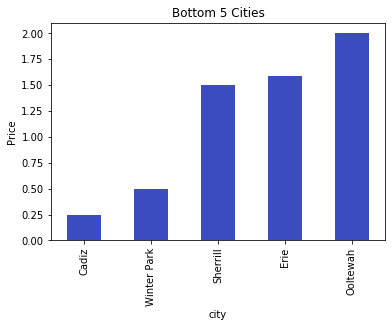

In [0]:
fig, ax = plt.subplots()  
bottom.plot(kind='bar', colormap='coolwarm', style='vertical')
plt.ylabel('Price')
plt.title('Bottom 5 Cities')
plt.show()

In [0]:
#What is the number of restaurants serving pizza per capita (100,000 residents) across the U.S.?
df.head()

,store_name,city,state,zip,keys,latitude,longitude,menu_description,menu_name,has_meat,has_veg,price,state_population,state_land_area,state_population_density,state_median_income,min_distance
0,Shotgun Dans Pizza,Sherwood,AR,72120,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,NaN,Cheese Pizza,0,0,7.98,2978204,52068,57.2,43813,0.0478
1,Sauce Pizza Wine,Phoenix,AZ,85012,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,Pizza Cookie,0,0,6.00,6828065,113635,60.1,53510,0.0044
2,Mios Pizzeria,Cincinnati,OH,45209,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,0,0,6.49,11613423,40948,283.6,52407,0.0287
3,Hungry Howies Pizza,Madison Heights,MI,48071,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,Small Pizza,0,0,5.99,9922576,56804,174.7,52668,0.0246
4,Spartan Pizzeria,Baltimore,MD,21224,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,Pizza Sub,0,0,5.49,6006401,9774,614.5,78916,0.0049


In [0]:
ddf = df.drop_duplicates()

In [0]:
stores = pd.pivot_table(ddf,index = ('state','city'),values = 'store_name',aggfunc = np.ma.count).reset_index()
stores

,state,city,store_name
0,AK,Anchorage,1
1,AK,Fairbanks,1
2,AK,Palmer,1
3,AL,Birmingham,2
4,AL,Gardendale,2
...,...,...,...
1087,WV,Bridgeport,1
1088,WV,Charleston,14
1089,WV,Fayetteville,4
1090,WV,Martinsburg,6


In [0]:
pop = pd.pivot_table(ddf,index = ('state','city'),values = 'state_population',aggfunc = np.mean).reset_index()
pop

,state,city,state_population
0,AK,Anchorage,738432
1,AK,Fairbanks,738432
2,AK,Palmer,738432
3,AL,Birmingham,4858979
4,AL,Gardendale,4858979
...,...,...,...
1087,WV,Bridgeport,1844128
1088,WV,Charleston,1844128
1089,WV,Fayetteville,1844128
1090,WV,Martinsburg,1844128


In [0]:
newdf = pd.merge(stores, pop, on=['state','city'])

In [0]:
newdf['restaurantspercapita'] = round((newdf.store_name*100000)/newdf.state_population,2)

In [0]:
newdf

,state,city,store_name,state_population,#restaurantspercapita,restaurantspercapita
0,AK,Anchorage,1,738432,0.14,0.14
1,AK,Fairbanks,1,738432,0.14,0.14
2,AK,Palmer,1,738432,0.14,0.14
3,AL,Birmingham,2,4858979,0.04,0.04
4,AL,Gardendale,2,4858979,0.04,0.04
...,...,...,...,...,...,...
1087,WV,Bridgeport,1,1844128,0.05,0.05
1088,WV,Charleston,14,1844128,0.76,0.76
1089,WV,Fayetteville,4,1844128,0.22,0.22
1090,WV,Martinsburg,6,1844128,0.33,0.33


In [0]:
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot 

In [0]:
data = dict(type = 'choropleth', 
  
            # location: Arizoana, California, Newyork 
            locations = newdf.state, 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'viridis', 
        
              
            # text can be given anything you like 
            text = "State", 
            z = newdf.restaurantspercapita, 
            colorbar = {'title': 'Number of Restaurants Per Capita in Each State'}) 
              
layout = dict(geo ={'scope': 'usa'}) 
choromap = go.Figure(data = [data], layout = layout) 
  
# plotting graph 
iplot(choromap) 

In [0]:
#What is the median price of a pizza across the U.S.?
median = df.groupby(['state'])['price'].median().sort_values(0, ascending=False)

In [0]:
median = median.reset_index()

In [0]:
median

In [0]:
data = dict(type = 'choropleth', 
  
            # location: Arizoana, California, Newyork 
            locations = median.state, 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'viridis', 
        
              
            # text can be given anything you like 
            text = "State", 
            z = median.price, 
            colorbar = {'title': 'Median Prices in Each State'}) 
              
layout = dict(geo ={'scope': 'usa'}) 
choromap = go.Figure(data = [data], layout = layout) 
  
# plotting graph 
iplot(choromap)

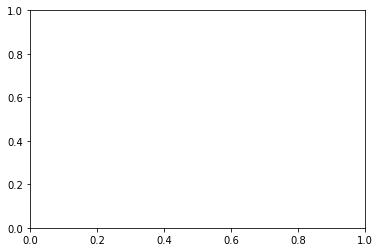

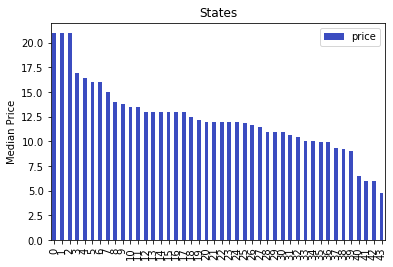

In [0]:
fig, ax = plt.subplots()  
median.plot(kind='bar', colormap='coolwarm')
plt.ylabel('Median Price')
plt.title('States')
plt.show()

In [0]:
#Which cities have the most restaurants serving pizza per capita (100,000 residents)?
newdf.groupby(['city'])['#restaurantspercapita'].sum().sort_values(0, ascending=False)

city
New York         3.253217
Brooklyn         2.293417
Reno             2.248478
Seattle          1.882753
Albuquerque      1.726528
                   ...   
Dana Point       0.002555
Ventura          0.002555
Hawthorne        0.002555
Visalia          0.002555
Mountain View    0.002555
Name: #restaurantspercapita, Length: 1018, dtype: float64

In [0]:
#What factors contribute the most to pizza price?
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,latitude,longitude,has_meat,has_veg,price,state_population,state_land_area,state_population_density,state_median_income,min_distance
latitude,1,0.183099,0.0350725,0.00803811,0.0744312,-0.356824,-0.444212,0.0961657,0.301656,-0.0514314
longitude,0.183099,1,-0.058235,-0.127023,-0.0248564,-0.338644,-0.668795,0.599627,-0.243445,-0.0716761
has_meat,0.0350725,-0.058235,1,0.287782,0.083911,0.00269627,0.0178712,-0.0522325,0.02269,-0.0214054
has_veg,0.00803811,-0.127023,0.287782,1,0.110627,0.0727637,0.0695556,-0.0551637,0.0755607,-0.0256007
price,0.0744312,-0.0248564,0.083911,0.110627,1,0.096783,0.0152424,0.10706,0.136792,-0.0292523
state_population,-0.356824,-0.338644,0.00269627,0.0727637,0.096783,1,0.58091,0.324578,0.474081,-0.0584921
state_land_area,-0.444212,-0.668795,0.0178712,0.0695556,0.0152424,0.58091,1,-0.428215,0.176099,0.000515247
state_population_density,0.0961657,0.599627,-0.0522325,-0.0551637,0.10706,0.324578,-0.428215,1,0.348233,-0.0561901
state_median_income,0.301656,-0.243445,0.02269,0.0755607,0.136792,0.474081,0.176099,0.348233,1,6.54351e-05
min_distance,-0.0514314,-0.0716761,-0.0214054,-0.0256007,-0.0292523,-0.0584921,0.000515247,-0.0561901,6.54351e-05,1


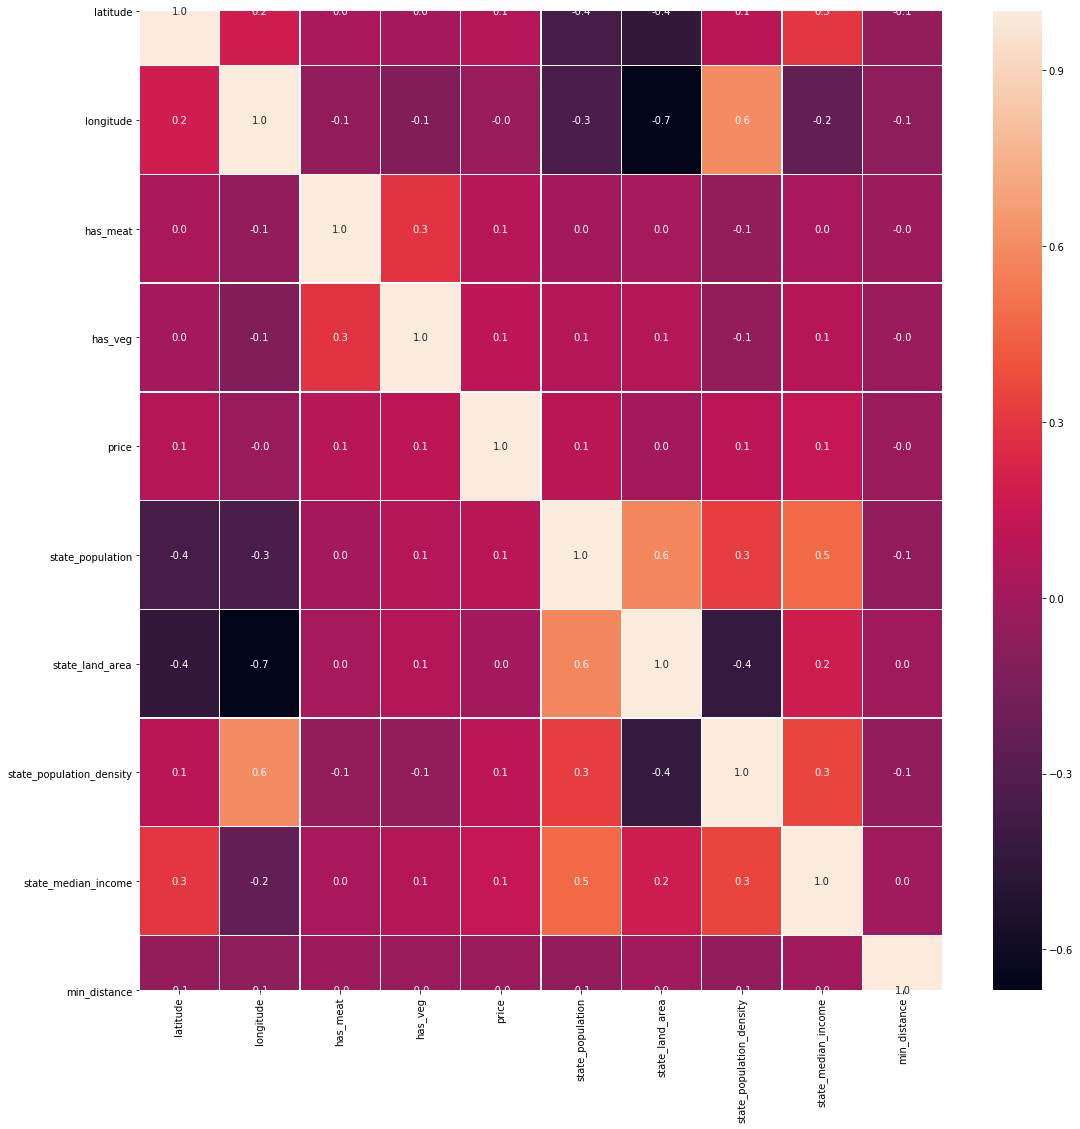

In [0]:
import seaborn as sns
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [0]:
data = dict(type = 'choropleth', 
  
            # location: Arizoana, California, Newyork 
            locations = newdf.state, 
              
            # States of USA 
            locationmode = 'USA-states', 
              
            # colorscale can be added as per requirement 
            colorscale = 'viridis', 
        
              
            # text can be given anything you like 
            text = "State", 
            z = newdf.restaurantspercapita, 
            colorbar = {'title': 'Number of Restaurants Per Capita in Each State'}) 
              
layout = dict(geo ={'scope': 'usa'}) 
choromap = go.Figure(data = [data], layout = layout) 
  
# plotting graph 
iplot(choromap) 

In [0]:
df.head()

,store_name,city,state,zip,keys,latitude,longitude,menu_description,menu_name,has_meat,has_veg,price,state_population,state_land_area,state_population_density,state_median_income,min_distance
0,Shotgun Dans Pizza,Sherwood,AR,72120,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,NaN,Cheese Pizza,0,0,7.98,2978204,52068,57.2,43813,0.0478
1,Sauce Pizza Wine,Phoenix,AZ,85012,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,Pizza Cookie,0,0,6.00,6828065,113635,60.1,53510,0.0044
2,Mios Pizzeria,Cincinnati,OH,45209,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,0,0,6.49,11613423,40948,283.6,52407,0.0287
3,Hungry Howies Pizza,Madison Heights,MI,48071,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,Small Pizza,0,0,5.99,9922576,56804,174.7,52668,0.0246
4,Spartan Pizzeria,Baltimore,MD,21224,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,Pizza Sub,0,0,5.49,6006401,9774,614.5,78916,0.0049


In [0]:
from sklearn.model_selection import train_test_split
seed = 123
df_for_ML = df.drop(['zip',
                     'menu_description',
                     'menu_name','city',
                     'store_name',
                     'state',
                     'keys',
                     'state_population',
                     'state_land_area',
                     'latitude',
                     'longitude'],axis = 1)
X = df_for_ML.drop(['price'],axis = 1)
y = df_for_ML['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=seed)

In [0]:
df_for_ML

,has_meat,has_veg,price,state_population_density,state_median_income,min_distance
0,0,0,7.98,57.2,43813,0.0478
1,0,0,6.00,60.1,53510,0.0044
2,0,0,6.49,283.6,52407,0.0287
3,0,0,5.99,174.7,52668,0.0246
4,0,0,5.49,614.5,78916,0.0049
...,...,...,...,...,...,...
9919,1,0,22.10,419.3,62765,0.0109
9920,0,0,10.10,419.3,62765,0.0109
9921,1,0,8.45,231.4,61229,0.0039
9922,0,0,8.45,231.4,61229,0.0039


In [0]:
import statsmodels.api as sm
lr = sm.OLS(y_train,X_train)
results = lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.812
Model:                            OLS   Adj. R-squared (uncentered):              0.812
Method:                 Least Squares   F-statistic:                              6876.
Date:                Tue, 05 Nov 2019   Prob (F-statistic):                        0.00
Time:                        02:34:34   Log-Likelihood:                         -25978.
No. Observations:                7939   AIC:                                  5.197e+04
Df Residuals:                    7934   BIC:                                  5.200e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
has_meat                     0.8290      0.156      5.324      0.000       0.524       1.134
has_veg                      1.3238      0.169      7.828      0.000       0.992       1.655
state_population_density     0.0030      0.001      5.325      0.000       0.002       0.004
state_median_income          0.0002   3.06e-06     64.492      0.000       0.000       0.000
min_distance                -0.2319      0.152     -1.526      0.127      -0.530       0.066
==============================================================================
Omnibus:                      767.322   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1458.134
Skew:                           0.651   Prob(JB):                         0.00
Kurtosis:                       4.647   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
y_pred_lr = results.predict(X_test)
y_pred_lr

1130    12.000039
1586    15.518093
1344    12.023226
498     13.636091
7479    14.465386
          ...    
3817    18.236594
8799    16.144019
358     10.906034
328     14.000537
6953    14.378817
Length: 1985, dtype: float64

In [0]:
error_lr = abs(y_pred_lr - y_test)
error_lr

1130     4.489961
1586     5.018093
1344    12.976774
498     11.386091
7479     9.284614
          ...    
3817     5.753406
8799     5.154019
358      4.636034
328      1.989463
6953     7.378817
Length: 1985, dtype: float64

In [0]:
print("MAE:",round(np.mean(error_lr),2),"dollars")

MAE: 4.92 dollars


In [0]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred_lr1 = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr1))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.04131565764134115
Root Mean Squared Error: 6.514070008769265


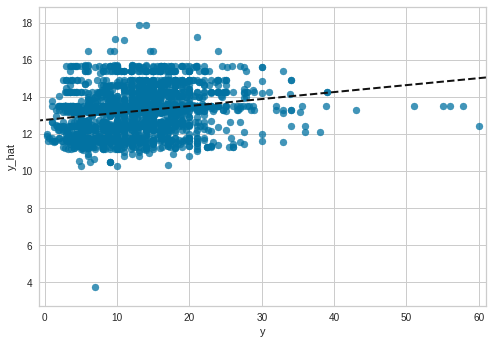

In [0]:
from yellowbrick.regressor import PredictionError
visualizer_lr = PredictionError(reg_all)
visualizer_lr.fit(X_train,y_train)
visualizer_lr.score(X_test,y_test)
plt.xlabel('y')
plt.ylabel('y_hat')
plt.show()

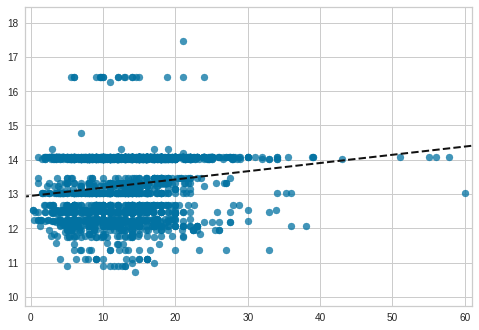

In [0]:
from sklearn.linear_model import Lasso
model = PredictionError(Lasso())
model.fit(X_train, y_train)
model.score(X_test, y_test)
plt.show()

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 123)
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
rf_pred= rf.predict(X_test)
# Calculate the absolute errors
rf_errors = abs(rf_pred - y_test)
# Print out the mean absolute error (mae)
print('MAE:', round(np.mean(rf_errors), 2), 'dollars.')

MAE: 4.29 dollars.


In [0]:
print("Feature Importances:", rf.feature_importances_)
print("Random Forest Scores", round(rf.score(X_test, y_test),2))

Feature Importances: [0.06356773 0.04318513 0.09850805 0.12497257 0.66976651]
Random Forest Scores 0.16


In [0]:
ssr_rf = np.mean(np.dot((np.array(y_test) - rf_pred).T,(np.array(y_test) - rf_pred)))
ssr_rf

73950.02904098885

In [0]:
sst = np.dot((y_test - y_test.mean()).T,(y_test - y_test.mean()))
sst

87859.70085823674

In [0]:
rsq_rf = 1 - ssr_rf/sst
rsq_rf

0.15831685837049914

In [0]:
# Get feature list
feature_list = list(X_train.columns)
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: min_distance         Importance: 0.67
Variable: state_median_income  Importance: 0.12
Variable: state_population_density Importance: 0.1
Variable: has_meat             Importance: 0.06
Variable: has_veg              Importance: 0.04


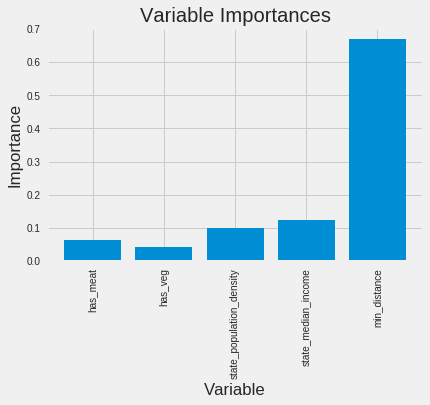

In [0]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [0]:
rf_feature_importance = rf.feature_importances_
rf_feature_importance_df = pd.DataFrame(rf_feature_importance,columns=['feature_importance'])
rf_feature_importance_df.rename(index = {0:'has_meat',1:'has_veg',2:'state_population_density',3:'state_median_income',4:'min_distance'},inplace = True)
rf_feature_importance_df

,feature_importance
has_meat,0.063568
has_veg,0.043185
state_population_density,0.098508
state_median_income,0.124973
min_distance,0.669767


In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
feature_list = list(X_train.columns)
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')
from google.colab import files
files.download('small_tree.png')

In [0]:
'''
# Plot the actual values
# Plot the predicted values
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, rf_pred, color='red')
# Graph labels
plt.xlabel('y_test') 
plt.ylabel('rf_pred')
plt.title('Actual and Predicted Values')
'''

"\n# Plot the actual values\n# Plot the predicted values\nplt.scatter(X_test, y_test, color='blue')\nplt.plot(X_test, rf_pred, color='red')\n# Graph labels\nplt.xlabel('y_test') \nplt.ylabel('rf_pred')\nplt.title('Actual and Predicted Values')\n"

In [0]:
'''
#Tunning the model based on the results from RandomizedSearchCV
rf1 = RandomForestRegressor(random_state = 123, 
                            bootstrap = True, max_depth = 20,
                            max_features = 'sqrt', min_samples_leaf = 1,
                            min_samples_split = 2, n_estimators = 1000)
rf1.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions1 = rf1.predict(X_test)
# Calculate the absolute errors
errors1 = abs(predictions1 - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors1), 2), 'dollars.')
print("Feature Importances:", rf1.feature_importances_)
print("Random Forest Scores", round(rf1.score(X_test, y_test),2))
'''


'\n#Tunning the model based on the results from RandomizedSearchCV\nrf1 = RandomForestRegressor(random_state = 123, \n                            bootstrap = True, max_depth = 20,\n                            max_features = \'sqrt\', min_samples_leaf = 1,\n                            min_samples_split = 2, n_estimators = 1000)\nrf1.fit(X_train, y_train)\n\n# Use the forest\'s predict method on the test data\npredictions1 = rf1.predict(X_test)\n# Calculate the absolute errors\nerrors1 = abs(predictions1 - y_test)\n# Print out the mean absolute error (mae)\nprint(\'Mean Absolute Error:\', round(np.mean(errors1), 2), \'dollars.\')\nprint("Feature Importances:", rf1.feature_importances_)\nprint("Random Forest Scores", round(rf1.score(X_test, y_test),2))\n'

In [0]:
'''
#By Far the Best one with the lowest MAE.
rf2 = RandomForestRegressor(random_state = 123, 
                            bootstrap = True, max_depth = 110,
                            max_features ='sqrt', min_samples_leaf =1,
                            min_samples_split = 2, n_estimators = 1000)
rf2.fit(X_train, y_train)

# Use the forest's predict method on the test data
predictions2 = rf2.predict(X_test)
# Calculate the absolute errors
errors2 = predictions2 - y_test
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(np.abs(errors2)), 2), 'dollars.')
print("Feature Importances:", rf2.feature_importances_)
print("Random Forest Scores", round(rf2.score(X_test, y_test),2))
'''

'\n#By Far the Best one with the lowest MAE.\nrf2 = RandomForestRegressor(random_state = 123, \n                            bootstrap = True, max_depth = 110,\n                            max_features =\'sqrt\', min_samples_leaf =1,\n                            min_samples_split = 2, n_estimators = 1000)\nrf2.fit(X_train, y_train)\n\n# Use the forest\'s predict method on the test data\npredictions2 = rf2.predict(X_test)\n# Calculate the absolute errors\nerrors2 = predictions2 - y_test\n# Print out the mean absolute error (mae)\nprint(\'Mean Absolute Error:\', round(np.mean(np.abs(errors2)), 2), \'dollars.\')\nprint("Feature Importances:", rf2.feature_importances_)\nprint("Random Forest Scores", round(rf2.score(X_test, y_test),2))\n'

In [0]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import Sequential
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
n_cols = X_train.shape[1]
earlystopping = EarlyStopping(patience=2)
nn = Sequential()
nn.add(Dense(512,activation='relu',input_shape = (n_cols,)))
nn.add(Dropout(0.2))
nn.add(Dense(512,activation='relu'))
nn.add(Dropout(0.2))
nn.add(Dense(512,activation='relu'))
##Output layer
nn.add(Dense(1,activation = 'linear'))
##Compile the network
nn.compile(optimizer='adam',loss='mean_absolute_error',metrics=['mean_absolute_error'])
##Fit the model
nn_training = nn.fit(X_train,y_train ,epochs=30,validation_split=0.2,callbacks=[earlystopping])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Train on 6351 samples, validate on 1588 samples
Epoch 1/30





6351/6351 [==============================] - 3s 549us/step - loss: 287.1046 - mean_absolute_error: 287.1046 - val_loss: 27.3118 - val_mean_absolute_error: 27.3118
Epoch 2/30
6351/6351 [==============================] - 2s 388us/step - loss: 14.5018 - mean_absolute_error: 14.5018 - val_loss: 7.3168 - val_mean_absolute_error: 7.3168
Epoch 3/30
6351/6351 [==============================] - 2s 385us/step - loss: 8.6017 - mean_absolute_error: 8.6017 - val_loss: 12.3971 - val_mean_absolute_error: 12.3971
Epoch 4/30
6351/6351 [==============================] - 2s 382us/step - loss: 8.0052 - mean_absolute_error: 8.0052 - val_loss: 8.2976 - val_mean_absolute_error: 8.2976


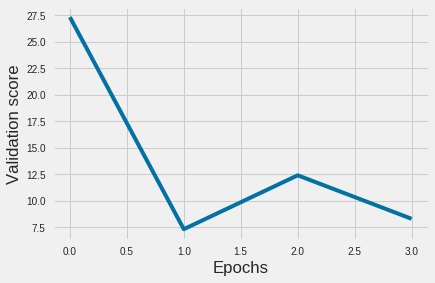

In [0]:
##Create the plot
plt.plot(nn_training.history['val_loss'],'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [0]:
nn_pred = nn.predict(X_test)
nn_pred

array([[5.0277767],
       [5.80916  ],
       [5.181864 ],
       ...,
       [5.029188 ],
       [5.736101 ],
       [5.6332893]], dtype=float32)

In [0]:
nn_errors = np.mean(abs(nn_pred - 
np.array(y_test)))

In [0]:
print("MAE:",round(nn_errors,2),'dollars')

MAE: 8.29 dollars


In [0]:
sst = np.dot((y_test - y_test.mean()).T,(y_test - y_test.mean()))
sst

87859.70085823674

In [0]:
ssr_nn = np.mean(np.dot((np.array(y_test) - nn_pred).T,(np.array(y_test) - nn_pred)))
ssr_nn

123696.78682600478

In [0]:
rsq_nn = 1 - ssr_nn/sst
rsq_nn

-0.4078899156006899